# Diverses petites manips de débug

Ce notebook rassemble quelques petites études ou vérifications réalisées au cours du développement. Elles n'ont pas eu d'autre impacts que de permettre quelques réglages dans le code.

In [4]:
import geopandas as gpd
import pandas as pd
import topojson as tp
import json
import re

# Coordonnées de la région

Calcul de la moyenne des centroïdes des EPCI, utilisé pour positionner le centre de la carte

In [5]:
epci_aura_simple = gpd.read_file("../data/epci_aura.geojson")

In [6]:
centroid = epci_aura_simple.centroid
N=0
X=0
Y=0
for p in centroid:
    N += 1
    X += p.x
    Y += p.y
print(f"{X/N}, {Y/N}")

4.768941423410298, 45.55162025863237


/tmp/ipykernel_359161/3986101904.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = epci_aura_simple.centroid


# pb de format de code commune ?

...entre DATA.xlsx et mes shapefiles. Probablement un 0 au début ou qqch comme ça, avec un effet marrant: certains dépertements manquent à la carte

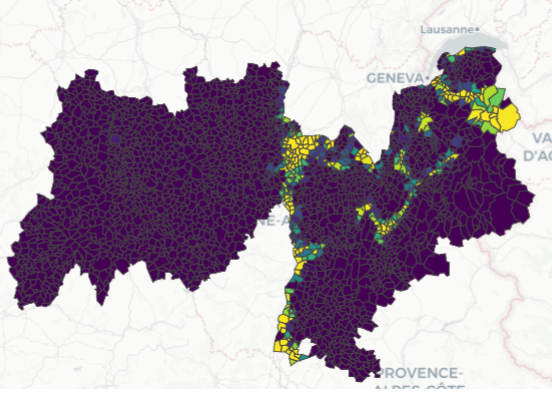

In [7]:
dat = pd.read_csv("../data/DATA_v2.csv", sep= ";", encoding="ISO-8859-1", dtype={"code_territoire": str})

In [8]:
codes = dat["code_territoire"].tolist()
for i in range(len(communes_aura_simple)):
    if communes_aura_simple.iloc[i]["code_territoire"] not in codes:
        raise ValueError(f"missing {communes_aura_simple.iloc[i]["code_territoire"]}')
        break

SyntaxError: unterminated string literal (detected at line 4) (4140359681.py, line 4)

Conclusion: c'étaient bien les départements commençant par 0 qui manquaient, et forcer le code_territoire à être lu en tant que chaine de caractères (plutôt qu'en tant que nombre) règle bien le problème. Je suppose que ce bug arrive systématiquements aux datascientists débutants avec des données administratives !